In [3]:
# import the modules needed.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.maf.db import ResultsDb

In [7]:
runs = ['ewok_1004', 'enigma_1189']
resDb = {}
for r in runs:
    dbs = ['_scheduler_results.db', '_science_results.db']
    resDb[r] = {}
    for d in dbs:
        resDb[r][d] = ResultsDb(database=r+d)

In [10]:
# Zeljko's standard comparison run
filterlist = ('u', 'g' ,'r', 'i', 'z', 'y')
summaries = {}
summaries['TotalVisits'] = {'metricName':'NVisits', 'metricMetadata':'All Visits', 'slicerName':None, 
                            'summaryName':'Count'}
#summaries['NVisits Per Prop'] = {'metricName':'NVisits', 'metricMetata':None, 'slicerName':None, 
#                                 'summaryName':'Fraction of Total'}
summaries['Survey Effective Time'] = {'metricName':'Total effective time of survey', 'metricMetadata':'All Visits',
                                     'slicerName':None, 'summaryName':'(days)'}
summaries['Open Shutter Fraction'] = {'metricName':'OpenShutterFraction', 'metricMetadata':None, 'slicerName':None,
                                      'summaryName':'Median'}
for f in filterlist:
    metricMetadata = '%s band, WFD' %f
    summaries['Median NVisits Per Field'] = {'metricName':'NVisits', 'metricMetadata':metricMetadata, 
                                             'slicerName':'OpsimFieldSlicer', 'summaryName':'Median'}
summaries['NVisits Per Night'] = {'metricName':'NVisits', 'metricMetadata':'Per night', 'slicerName':'OneDSlicer',
                                 'summaryName':'Median'}
summaries['Nights with obs'] = {'metricName':'Nights with observations', 'metricMetadata':'All Visits', 
                               'slicerName':'UniSlicer', 'summaryName':'(days)'}
summaries['Mean Slew Time'] = {'metricName':'Mean slewTime', 'metricMetadata':None, 'slicerName':'UniSlicer', 
                               'summaryName':None}
summaries['FO_Area'] = {'metricName':'fO', 'metricMetadata':None, 'slicerName':'HealpixSlicer', 
                      'summaryName':'fONv: Area (sqdeg)'}
summaries['FO_NVisits'] = {'metricName':'fO', 'metricMetadata':None, 'slicerName':'HealpixSlicer', 
                      'summaryName':'fOArea: Nvisits (#)'}


In [12]:
stats = {}
for r in runs:
    stats[r] = np.zeros(len(summaries), float)
    for i, summary in enumerate(summaries.itervalues()):
        for d in dbs:
            mIds = resDb[r][d].getMetricId(metricName=summary['metricName'], metricMetadata=summary['metricMetadata'],
                                       slicerName=summary['slicerName'])
            if len(mIds) > 0:
                s = resDb[r][d].getSummaryStats(mIds, summaryName=summary['summaryName'])
                stats[r][i] = s['summaryValue'][0]
    print r, stats[r]

ewok_1004 [  8.88000000e+02   6.82632627e+00   1.80590814e+04   3.02600000e+03
   7.34328908e-01   1.80000000e+02   8.17000000e+02   2.44727000e+06
   2.86747590e+02]
enigma_1189 [  8.99000000e+02   6.94987078e+00   1.80590814e+04   3.06200000e+03
   7.32403736e-01   1.81000000e+02   8.15000000e+02   2.46930700e+06
   4.69606087e+02]


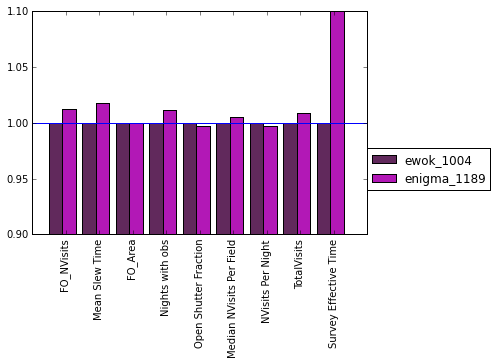

In [17]:
baseline = stats['ewok_1004']
xoffset = 0.8/(float(len(runs)))
x = np.arange(len(baseline))
colors = np.random.random_sample((len(baseline), 3))
for i, r in enumerate(runs):
    plt.bar(x+i*xoffset-0.5, stats[r]/baseline, width=xoffset, color=colors[i], label=r)
plt.xticks(x, summaries.keys(), rotation=90)
plt.axhline(1.0)
plt.ylim(0.9, 1.1)
plt.legend(loc=(1.0, 0.2))

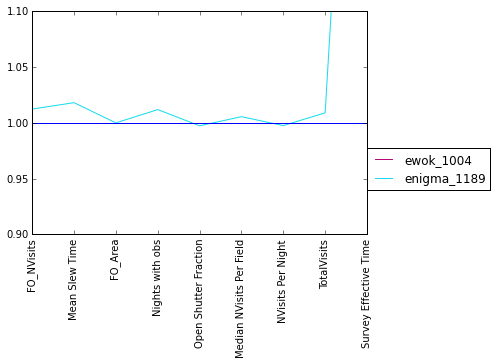

In [15]:
baseline = stats['ewok_1004']
xoffset = 0.8/(float(len(runs)))
x = np.arange(len(baseline))
colors = np.random.random_sample((len(baseline), 3))
for i, r in enumerate(runs):
    plt.plot(x, stats[r]/baseline, color=colors[i], label=r)
plt.xticks(x, summaries.keys(), rotation=90)
plt.axhline(1.0)
plt.ylim(0.9, 1.1)
plt.legend(loc=(1.0, 0.2))